In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
#Import inspect for easier table reading
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, or_, and_
import math

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [31]:
# Queries to test correct reflection of tables
# Create inspector
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [32]:
# Check columns of measurement for future queries
measurement_col_names = inspector.get_columns('measurement')
for col in measurement_col_names:
    print(col['name'])

id
station
date
prcp
tobs


In [33]:
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [34]:
# Create a function to calculate delta time for months
# Calculate the date 1 year ago from the last data point in the database
def delta_time_with_months(date, delta_months):
    (year, month, day) = int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])
    # Get remainder for 12 months as new month
    new_month = (month+delta_months) % 12 if ((month+delta_months) % 12 >= 10)  else f'0{(month+delta_months) % 12}'  
    new_year = year + math.floor(((month+delta_months)/12))
    return (f'{new_year}-{new_month}-{day}')
print(delta_time_with_months('2017-08-23',32))

2020-04-23


In [35]:
# Get last measurement date
last_measurement_date = (
    session.query(Measurement.date).
    order_by(Measurement.date.desc())
    .first()
)
last_measurement_date

('2017-08-23')

In [36]:
limit_date_12_months = delta_time_with_months(last_measurement_date[0], -12)
limit_date_12_months

'2016-08-23'

In [37]:
# Clean all None values from prcp
measurements_last_12 = (
    session.query(Measurement).
    filter(Measurement.prcp != None).
    all()
)
for measure in measurements_last_12:
    print(f"Date: {measure.date} - {measure.prcp}") 

Date: 2010-01-01 - 0.08
Date: 2010-01-02 - 0.0
Date: 2010-01-03 - 0.0
Date: 2010-01-04 - 0.0
Date: 2010-01-07 - 0.06
Date: 2010-01-08 - 0.0
Date: 2010-01-09 - 0.0
Date: 2010-01-10 - 0.0
Date: 2010-01-11 - 0.01
Date: 2010-01-12 - 0.0
Date: 2010-01-14 - 0.0
Date: 2010-01-15 - 0.0
Date: 2010-01-16 - 0.0
Date: 2010-01-17 - 0.0
Date: 2010-01-18 - 0.0
Date: 2010-01-19 - 0.0
Date: 2010-01-20 - 0.0
Date: 2010-01-21 - 0.0
Date: 2010-01-22 - 0.0
Date: 2010-01-23 - 0.0
Date: 2010-01-24 - 0.01
Date: 2010-01-25 - 0.0
Date: 2010-01-26 - 0.04
Date: 2010-01-27 - 0.12
Date: 2010-01-28 - 0.0
Date: 2010-01-31 - 0.03
Date: 2010-02-01 - 0.01
Date: 2010-02-04 - 0.01
Date: 2010-02-05 - 0.0
Date: 2010-02-06 - 0.0
Date: 2010-02-07 - 0.0
Date: 2010-02-08 - 0.0
Date: 2010-02-09 - 0.0
Date: 2010-02-11 - 0.0
Date: 2010-02-12 - 0.02
Date: 2010-02-13 - 0.01
Date: 2010-02-14 - 0.0
Date: 2010-02-15 - 0.0
Date: 2010-02-16 - 0.0
Date: 2010-02-17 - 0.0
Date: 2010-02-20 - 0.03
Date: 2010-02-21 - 0.0
Date: 2010-02-22 - 0.0

Date: 2016-01-09 - 0.03
Date: 2016-01-10 - 0.01
Date: 2016-01-11 - 0.0
Date: 2016-01-12 - 0.0
Date: 2016-01-13 - 0.0
Date: 2016-01-14 - 0.0
Date: 2016-01-15 - 0.0
Date: 2016-01-16 - 0.01
Date: 2016-01-17 - 0.0
Date: 2016-01-18 - 0.0
Date: 2016-01-19 - 0.0
Date: 2016-01-20 - 0.0
Date: 2016-01-21 - 0.0
Date: 2016-01-22 - 0.0
Date: 2016-01-23 - 0.0
Date: 2016-01-24 - 0.0
Date: 2016-01-25 - 0.04
Date: 2016-01-26 - 0.16
Date: 2016-01-27 - 0.01
Date: 2016-01-28 - 0.0
Date: 2016-01-29 - 0.0
Date: 2016-01-30 - 0.0
Date: 2016-01-31 - 0.0
Date: 2016-02-01 - 0.0
Date: 2016-02-02 - 0.06
Date: 2016-02-03 - 0.0
Date: 2016-02-04 - 0.0
Date: 2016-02-05 - 0.0
Date: 2016-02-06 - 0.0
Date: 2016-02-07 - 0.02
Date: 2016-02-08 - 0.01
Date: 2016-02-09 - 0.0
Date: 2016-02-10 - 0.0
Date: 2016-02-11 - 0.0
Date: 2016-02-12 - 0.02
Date: 2016-02-13 - 0.0
Date: 2016-02-14 - 0.0
Date: 2016-02-15 - 0.0
Date: 2016-02-16 - 0.02
Date: 2016-02-17 - 0.21
Date: 2016-02-18 - 0.02
Date: 2016-02-19 - 0.03
Date: 2016-02-20 - 0

Date: 2012-07-25 - 0.01
Date: 2012-07-26 - 0.01
Date: 2012-07-27 - 0.0
Date: 2012-07-28 - 0.43
Date: 2012-07-29 - 0.09
Date: 2012-07-30 - 0.08
Date: 2012-07-31 - 0.03
Date: 2012-08-01 - 0.0
Date: 2012-08-02 - 0.0
Date: 2012-08-03 - 0.0
Date: 2012-08-04 - 0.0
Date: 2012-08-05 - 0.1
Date: 2012-08-06 - 0.1
Date: 2012-08-07 - 0.02
Date: 2012-08-08 - 0.04
Date: 2012-08-09 - 0.02
Date: 2012-08-10 - 0.0
Date: 2012-08-11 - 0.02
Date: 2012-08-12 - 0.08
Date: 2012-08-13 - 0.06
Date: 2012-08-14 - 0.06
Date: 2012-08-15 - 0.01
Date: 2012-08-16 - 0.0
Date: 2012-08-17 - 0.0
Date: 2012-08-20 - 0.01
Date: 2012-08-21 - 0.03
Date: 2012-08-22 - 0.02
Date: 2012-08-23 - 0.03
Date: 2012-08-24 - 0.0
Date: 2012-08-25 - 0.0
Date: 2012-08-26 - 0.02
Date: 2012-08-27 - 0.0
Date: 2012-08-28 - 0.06
Date: 2012-08-29 - 0.08
Date: 2012-08-30 - 0.06
Date: 2012-08-31 - 0.04
Date: 2012-09-01 - 0.02
Date: 2012-09-02 - 0.08
Date: 2012-09-03 - 0.09
Date: 2012-09-04 - 0.0
Date: 2012-09-05 - 0.02
Date: 2012-09-06 - 0.02
Date: 

Date: 2010-10-25 - 0.0
Date: 2010-10-26 - 0.04
Date: 2010-10-27 - 0.11
Date: 2010-10-28 - 0.12
Date: 2010-10-29 - 0.28
Date: 2010-11-02 - 0.03
Date: 2010-11-03 - 0.13
Date: 2010-11-04 - 0.18
Date: 2010-11-05 - 0.09
Date: 2010-11-06 - 0.35
Date: 2010-11-07 - 0.14
Date: 2010-11-08 - 0.0
Date: 2010-11-09 - 0.01
Date: 2010-11-10 - 0.0
Date: 2010-11-11 - 0.01
Date: 2010-11-12 - 0.01
Date: 2010-11-13 - 0.1
Date: 2010-11-14 - 0.01
Date: 2010-11-15 - 0.08
Date: 2010-11-16 - 0.0
Date: 2010-11-17 - 0.0
Date: 2010-11-18 - 0.0
Date: 2010-11-19 - 0.16
Date: 2010-11-20 - 0.01
Date: 2010-11-23 - 0.0
Date: 2010-11-24 - 0.0
Date: 2010-11-27 - 0.0
Date: 2010-11-28 - 0.54
Date: 2010-11-29 - 0.22
Date: 2010-11-30 - 0.01
Date: 2010-12-01 - 0.03
Date: 2010-12-02 - 0.06
Date: 2010-12-03 - 0.22
Date: 2010-12-04 - 0.0
Date: 2010-12-05 - 0.0
Date: 2010-12-06 - 0.0
Date: 2010-12-07 - 0.0
Date: 2010-12-08 - 0.0
Date: 2010-12-09 - 0.12
Date: 2010-12-10 - 2.01
Date: 2010-12-11 - 0.26
Date: 2010-12-12 - 0.01
Date: 2

Date: 2012-01-31 - 0.0
Date: 2012-02-01 - 0.0
Date: 2012-02-02 - 0.0
Date: 2012-02-03 - 0.0
Date: 2012-02-07 - 0.48
Date: 2012-02-08 - 0.32
Date: 2012-02-09 - 0.0
Date: 2012-02-10 - 0.0
Date: 2012-02-14 - 0.0
Date: 2012-02-15 - 0.0
Date: 2012-02-22 - 0.0
Date: 2012-02-23 - 0.0
Date: 2012-02-24 - 0.0
Date: 2012-02-28 - 0.0
Date: 2012-03-20 - 0.0
Date: 2012-03-23 - 0.02
Date: 2012-04-03 - 0.0
Date: 2012-04-04 - 0.0
Date: 2012-04-05 - 0.0
Date: 2012-04-10 - 0.14
Date: 2012-04-11 - 0.07
Date: 2012-04-12 - 0.0
Date: 2012-04-13 - 0.0
Date: 2012-04-17 - 0.0
Date: 2012-04-23 - 0.26
Date: 2012-05-04 - 0.07
Date: 2012-05-08 - 0.0
Date: 2012-05-11 - 0.0
Date: 2012-05-14 - 0.0
Date: 2012-05-15 - 0.0
Date: 2012-05-16 - 0.0
Date: 2012-05-22 - 0.0
Date: 2012-05-23 - 0.0
Date: 2012-05-24 - 0.02
Date: 2012-05-25 - 0.0
Date: 2012-05-30 - 0.0
Date: 2012-05-31 - 0.02
Date: 2012-06-01 - 0.04
Date: 2012-06-05 - 0.0
Date: 2012-06-08 - 0.0
Date: 2012-06-13 - 0.0
Date: 2012-06-14 - 0.25
Date: 2012-06-19 - 0.02

Date: 2012-01-31 - 0.1
Date: 2012-02-01 - 0.0
Date: 2012-02-02 - 0.0
Date: 2012-02-03 - 0.0
Date: 2012-02-04 - 0.0
Date: 2012-02-05 - 0.0
Date: 2012-02-06 - 0.29
Date: 2012-02-07 - 0.49
Date: 2012-02-08 - 0.41
Date: 2012-02-09 - 0.03
Date: 2012-02-10 - 0.0
Date: 2012-02-11 - 0.0
Date: 2012-02-12 - 0.0
Date: 2012-02-13 - 0.09
Date: 2012-02-14 - 0.0
Date: 2012-02-15 - 0.04
Date: 2012-02-16 - 0.0
Date: 2012-02-17 - 0.0
Date: 2012-02-18 - 0.09
Date: 2012-02-19 - 0.03
Date: 2012-02-20 - 0.01
Date: 2012-02-21 - 0.0
Date: 2012-02-22 - 0.0
Date: 2012-02-23 - 0.0
Date: 2012-02-24 - 0.0
Date: 2012-02-25 - 0.1
Date: 2012-02-26 - 0.07
Date: 2012-02-27 - 0.0
Date: 2012-02-28 - 0.0
Date: 2012-02-29 - 0.0
Date: 2012-03-01 - 0.0
Date: 2012-03-02 - 0.0
Date: 2012-03-03 - 0.11
Date: 2012-03-04 - 0.1
Date: 2012-03-05 - 2.71
Date: 2012-03-06 - 6.38
Date: 2012-03-07 - 5.32
Date: 2012-03-08 - 0.22
Date: 2012-03-09 - 0.16
Date: 2012-03-10 - 0.17
Date: 2012-03-11 - 0.05
Date: 2012-03-12 - 0.15
Date: 2012-03-1

Date: 2010-07-02 - 0.23
Date: 2010-07-03 - 0.38
Date: 2010-07-04 - 0.38
Date: 2010-07-05 - 0.08
Date: 2010-07-06 - 0.14
Date: 2010-07-07 - 0.21
Date: 2010-07-08 - 0.06
Date: 2010-07-09 - 0.02
Date: 2010-07-10 - 0.19
Date: 2010-07-11 - 0.0
Date: 2010-07-12 - 0.0
Date: 2010-07-13 - 0.62
Date: 2010-07-14 - 0.2
Date: 2010-07-15 - 0.14
Date: 2010-07-16 - 0.01
Date: 2010-07-17 - 0.04
Date: 2010-07-18 - 0.31
Date: 2010-07-19 - 0.02
Date: 2010-07-20 - 0.1
Date: 2010-07-21 - 0.0
Date: 2010-07-22 - 0.19
Date: 2010-07-23 - 0.07
Date: 2010-07-24 - 0.35
Date: 2010-07-25 - 0.0
Date: 2010-07-26 - 0.0
Date: 2010-07-27 - 0.01
Date: 2010-07-28 - 0.16
Date: 2010-07-29 - 0.02
Date: 2010-07-30 - 0.0
Date: 2010-07-31 - 0.04
Date: 2010-08-01 - 0.14
Date: 2010-08-02 - 0.27
Date: 2010-08-03 - 0.02
Date: 2010-08-04 - 0.28
Date: 2010-08-05 - 0.11
Date: 2010-08-06 - 0.16
Date: 2010-08-07 - 0.17
Date: 2010-08-08 - 0.12
Date: 2010-08-09 - 0.12
Date: 2010-08-10 - 0.0
Date: 2010-08-11 - 0.0
Date: 2010-08-12 - 0.02
Da

Date: 2015-12-28 - 0.0
Date: 2015-12-29 - 0.16
Date: 2015-12-30 - 0.5
Date: 2015-12-31 - 0.09
Date: 2016-01-01 - 0.02
Date: 2016-01-02 - 0.03
Date: 2016-01-03 - 0.0
Date: 2016-01-04 - 0.0
Date: 2016-01-05 - 0.18
Date: 2016-01-06 - 0.35
Date: 2016-01-07 - 0.35
Date: 2016-01-08 - 0.02
Date: 2016-01-09 - 0.02
Date: 2016-01-10 - 0.02
Date: 2016-01-11 - 0.0
Date: 2016-01-12 - 0.02
Date: 2016-01-13 - 0.0
Date: 2016-01-14 - 0.0
Date: 2016-01-15 - 0.02
Date: 2016-01-16 - 0.05
Date: 2016-01-17 - 0.0
Date: 2016-01-18 - 0.0
Date: 2016-01-19 - 0.0
Date: 2016-01-20 - 0.01
Date: 2016-01-21 - 0.42
Date: 2016-01-22 - 0.0
Date: 2016-01-23 - 0.0
Date: 2016-01-24 - 0.0
Date: 2016-01-25 - 0.07
Date: 2016-01-26 - 0.74
Date: 2016-01-27 - 0.01
Date: 2016-01-28 - 0.0
Date: 2016-01-29 - 0.02
Date: 2016-01-30 - 0.01
Date: 2016-01-31 - 0.02
Date: 2016-02-01 - 0.07
Date: 2016-02-02 - 0.42
Date: 2016-02-03 - 0.2
Date: 2016-02-04 - 0.04
Date: 2016-02-05 - 0.0
Date: 2016-02-06 - 0.0
Date: 2016-02-07 - 0.05
Date: 201

Date: 2013-12-10 - 0.0
Date: 2013-12-11 - 0.0
Date: 2013-12-12 - 0.02
Date: 2013-12-13 - 0.0
Date: 2013-12-14 - 0.0
Date: 2013-12-15 - 0.06
Date: 2013-12-16 - 2.4
Date: 2013-12-17 - 0.01
Date: 2013-12-18 - 0.01
Date: 2013-12-19 - 0.05
Date: 2013-12-20 - 0.0
Date: 2013-12-21 - 0.0
Date: 2013-12-22 - 0.0
Date: 2013-12-23 - 0.08
Date: 2013-12-24 - 0.0
Date: 2013-12-25 - 0.0
Date: 2013-12-26 - 0.0
Date: 2013-12-27 - 0.0
Date: 2013-12-28 - 0.0
Date: 2013-12-29 - 0.0
Date: 2013-12-30 - 0.0
Date: 2014-01-01 - 0.0
Date: 2014-01-02 - 0.3
Date: 2014-01-03 - 1.05
Date: 2014-01-04 - 0.0
Date: 2014-01-05 - 0.0
Date: 2014-01-06 - 0.0
Date: 2014-01-07 - 0.0
Date: 2014-01-08 - 0.0
Date: 2014-01-09 - 0.01
Date: 2014-01-10 - 0.0
Date: 2014-01-11 - 0.06
Date: 2014-01-12 - 0.19
Date: 2014-01-13 - 0.42
Date: 2014-01-14 - 0.31
Date: 2014-01-15 - 0.0
Date: 2014-01-16 - 0.02
Date: 2014-01-17 - 0.0
Date: 2014-01-18 - 0.01
Date: 2014-01-19 - 0.0
Date: 2014-01-20 - 0.0
Date: 2014-01-21 - 0.0
Date: 2014-01-22 - 0

Date: 2014-06-16 - 0.38
Date: 2014-06-17 - 1.45
Date: 2014-06-18 - 0.32
Date: 2014-06-19 - 0.2
Date: 2014-06-20 - 0.75
Date: 2014-06-21 - 0.09
Date: 2014-06-22 - 0.03
Date: 2014-06-23 - 0.74
Date: 2014-06-24 - 0.07
Date: 2014-06-25 - 0.97
Date: 2014-06-26 - 0.42
Date: 2014-06-27 - 0.9
Date: 2014-06-28 - 1.29
Date: 2014-06-29 - 1.29
Date: 2014-07-02 - 0.42
Date: 2014-07-03 - 1.1
Date: 2014-07-04 - 0.07
Date: 2014-07-05 - 0.12
Date: 2014-07-06 - 1.34
Date: 2014-07-07 - 0.57
Date: 2014-07-08 - 0.42
Date: 2014-07-09 - 0.55
Date: 2014-07-10 - 0.33
Date: 2014-07-11 - 0.16
Date: 2014-07-12 - 0.16
Date: 2014-07-13 - 1.23
Date: 2014-07-14 - 1.01
Date: 2014-07-15 - 1.18
Date: 2014-07-18 - 1.04
Date: 2014-07-19 - 0.01
Date: 2014-07-20 - 4.3
Date: 2014-07-21 - 0.72
Date: 2014-07-22 - 0.14
Date: 2014-07-23 - 0.93
Date: 2014-07-24 - 0.13
Date: 2014-07-25 - 0.05
Date: 2014-07-26 - 0.26
Date: 2014-07-27 - 1.43
Date: 2014-07-28 - 0.0
Date: 2014-07-29 - 0.0
Date: 2014-07-30 - 0.0
Date: 2014-07-31 - 0.02

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Get data that has all values needed
# Perform a query to retrieve the data and precipitation scores
measurements_last_12 = (
    session.query(Measurement).
    order_by(Measurement.date.desc()).
    filter(and_(Measurement.prcp != None, Measurement.date >= limit_date_12_months)).
    all()
)
dates = [];
prcps = [];
for measure in measurements_last_12:
    print(f"Date: {measure.date} - {measure.prcp}") 
    dates.append(measure.date)
    prcps.append(measure.prcp)

Date: 2017-08-23 - 0.0
Date: 2017-08-23 - 0.0
Date: 2017-08-23 - 0.08
Date: 2017-08-23 - 0.45
Date: 2017-08-22 - 0.0
Date: 2017-08-22 - 0.0
Date: 2017-08-22 - 0.5
Date: 2017-08-21 - 0.0
Date: 2017-08-21 - 0.02
Date: 2017-08-21 - 0.56
Date: 2017-08-20 - 0.0
Date: 2017-08-20 - 0.01
Date: 2017-08-19 - 0.0
Date: 2017-08-19 - 0.0
Date: 2017-08-19 - 0.09
Date: 2017-08-18 - 0.0
Date: 2017-08-18 - 0.0
Date: 2017-08-18 - 0.06
Date: 2017-08-17 - 0.0
Date: 2017-08-17 - 0.05
Date: 2017-08-17 - 0.01
Date: 2017-08-17 - 0.13
Date: 2017-08-16 - 0.0
Date: 2017-08-16 - 0.07
Date: 2017-08-16 - 0.12
Date: 2017-08-16 - 0.42
Date: 2017-08-15 - 0.02
Date: 2017-08-15 - 0.0
Date: 2017-08-15 - 0.06
Date: 2017-08-15 - 0.32
Date: 2017-08-15 - 0.42
Date: 2017-08-14 - 0.0
Date: 2017-08-14 - 0.01
Date: 2017-08-14 - 0.08
Date: 2017-08-14 - 0.0
Date: 2017-08-14 - 0.22
Date: 2017-08-13 - 0.0
Date: 2017-08-13 - 0.0
Date: 2017-08-13 - 0.0
Date: 2017-08-12 - 0.0
Date: 2017-08-12 - 0.0
Date: 2017-08-12 - 0.14
Date: 2017-08

Date: 2016-08-28 - 0.14
Date: 2016-08-28 - 0.14
Date: 2016-08-28 - 0.14
Date: 2016-08-28 - 0.6
Date: 2016-08-28 - 2.07
Date: 2016-08-27 - 0.0
Date: 2016-08-27 - 0.18
Date: 2016-08-27 - 0.02
Date: 2016-08-27 - 0.0
Date: 2016-08-27 - 0.12
Date: 2016-08-26 - 0.0
Date: 2016-08-26 - 0.03
Date: 2016-08-26 - 0.02
Date: 2016-08-26 - 0.04
Date: 2016-08-26 - 0.0
Date: 2016-08-26 - 0.01
Date: 2016-08-25 - 0.08
Date: 2016-08-25 - 0.08
Date: 2016-08-25 - 0.0
Date: 2016-08-25 - 0.0
Date: 2016-08-25 - 0.21
Date: 2016-08-25 - 0.06
Date: 2016-08-25 - 0.11
Date: 2016-08-24 - 0.08
Date: 2016-08-24 - 2.15
Date: 2016-08-24 - 2.28
Date: 2016-08-24 - 1.22
Date: 2016-08-24 - 2.15
Date: 2016-08-24 - 1.45
Date: 2016-08-23 - 0.0
Date: 2016-08-23 - 0.15
Date: 2016-08-23 - 0.05
Date: 2016-08-23 - 0.02
Date: 2016-08-23 - 1.79
Date: 2016-08-23 - 0.7


In [39]:
# Save the query results as a Pandas DataFrame and set the index to the date column

measurements_df = pd.DataFrame({
    'Date': dates,
    'Precipitation': prcps
}).set_index('Date')
# measurements_df = measurements_df.groupby('Date').agg({
#     'Precipitation': 'max'
# })
measurements_df

,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02


In [40]:
date = dt.datetime.strptime(measurements_df.index[0], '%Y-%m-%d')+dt.timedelta(days=31)
date

datetime.datetime(2017, 9, 23, 0, 0)

In [41]:
str_date = date.strftime('%Y-%m-%d')
str_date

'2017-09-23'

In [42]:
start_date = measurements_df.index[0]
current_date = ''
x_locations = []
for date in range(10):
    if current_date == '':
        current_date = dt.datetime.strptime(start_date, '%Y-%m-%d')
    else:
        current_date = current_date+dt.timedelta(days=39)
    x_locations.append(current_date.strftime('%Y-%m-%d'))

In [43]:
x_loc = [x for x in measurements_df.index]
x_loc

['2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-22',
 '2017-08-22',
 '2017-08-22',
 '2017-08-21',
 '2017-08-21',
 '2017-08-21',
 '2017-08-20',
 '2017-08-20',
 '2017-08-19',
 '2017-08-19',
 '2017-08-19',
 '2017-08-18',
 '2017-08-18',
 '2017-08-18',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-12',
 '2017-08-12',
 '2017-08-12',
 '2017-08-11',
 '2017-08-11',
 '2017-08-11',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-09',
 '2017-08-09',
 '2017-08-09',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-06',
 '2017-08-06',
 '2017-08-06',
 '2017-08-06',
 '2017-08-05',
 '2017-08-05',
 '2017-08-

In [44]:
x_locations

['2017-08-23',
 '2017-10-01',
 '2017-11-09',
 '2017-12-18',
 '2018-01-26',
 '2018-03-06',
 '2018-04-14',
 '2018-05-23',
 '2018-07-01',
 '2018-08-09']

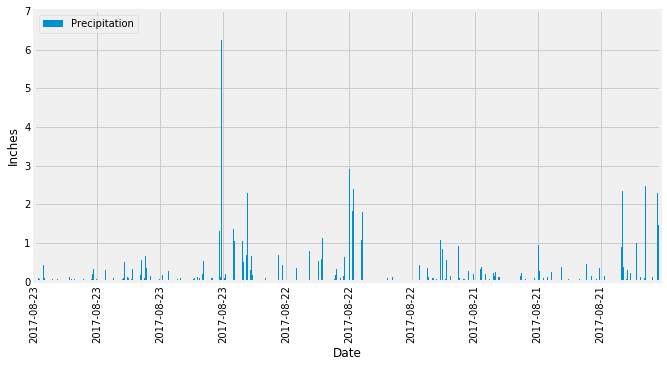

In [45]:
measurements_df.plot(kind='bar', rot=90, figsize=(10,5))
plt.locator_params(axis='x',nbins=10)
plt.ylabel('Inches')
plt.show()

In [46]:
# Design a query to show how many stations are available in this dataset?


In [47]:
# Check columns of station for future queries
station_col_names = inspector.get_columns('station')
for col in station_col_names:
    print(col['name'])

id
station
name
latitude
longitude
elevation


In [60]:
stations_count = (
    session.query(Measurement).
    group_by(Measurement.station)
    .count()
)
stations_count


9

In [67]:
# Check columns of measurement for future queries
measurement_col_names = inspector.get_columns('measurement')
for col in measurement_col_names:
    print(col['name'])

id
station
date
prcp
tobs


In [206]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()
stations_group = (
    session.query(Measurement.id, Measurement.station, func.count(Measurement.station).label('count')).
    group_by(Measurement.station).
    order_by('count').
    all()
)


for x in stations_group:
    print(f'{x}')

(9008, 'USC00518838', 511)
(7636, 'USC00517948', 1372)
(14960, 'USC00511918', 1979)
(5434, 'USC00514830', 2202)
(16939, 'USC00516128', 2612)
(9519, 'USC00519523', 2669)
(2725, 'USC00513117', 2709)
(1, 'USC00519397', 2724)
(12188, 'USC00519281', 2772)


In [207]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_most_observed = stations_group[-1]
station_most_observed

highest_temperature_recorded = (
    session.query(Measurement.id, Measurement.station, func.max(Measurement.tobs), ).
    filter(Measurement.station == station_most_observed[1])
    .first()
)
highest_temperature_recorded

(14261, 'USC00519281', 85.0)

In [208]:
avg_temperature_recorded = (
    session.query(Measurement.id, Measurement.station, func.avg(Measurement.tobs)).
    filter(Measurement.station == station_most_observed[1]).
    first()
)
avg_temperature_recorded

(12188, 'USC00519281', 71.66378066378067)

In [175]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [209]:
last_measurement_date = (
    session.query(Measurement.date).
    filter(Measurement.station == station_most_observed[1]).
    order_by(Measurement.date.desc()).
    first()
)
last_measurement_date

('2017-08-18')

In [213]:
limit_date_12_months = delta_time_with_months(last_measurement_date[0], -12)
limit_date_12_months

'2016-08-18'

In [257]:
st_most_observed_last_12 = (
    session.query(Measurement).
    filter(and_(
    Measurement.station == station_most_observed[1], Measurement.date >= limit_date_12_months)).
    order_by(Measurement.date.desc())
)
tobs = [];
for measure in measurements_last_12:
    print(f"Date: {measure.date} - {measure.tobs}") 
    tobs.append(measure.tobs)

Date: 2017-08-23 - 81.0
Date: 2017-08-23 - 82.0
Date: 2017-08-23 - 82.0
Date: 2017-08-23 - 76.0
Date: 2017-08-22 - 82.0
Date: 2017-08-22 - 82.0
Date: 2017-08-22 - 76.0
Date: 2017-08-21 - 81.0
Date: 2017-08-21 - 79.0
Date: 2017-08-21 - 76.0
Date: 2017-08-20 - 81.0
Date: 2017-08-20 - 80.0
Date: 2017-08-19 - 79.0
Date: 2017-08-19 - 80.0
Date: 2017-08-19 - 71.0
Date: 2017-08-18 - 80.0
Date: 2017-08-18 - 77.0
Date: 2017-08-18 - 79.0
Date: 2017-08-17 - 78.0
Date: 2017-08-17 - 83.0
Date: 2017-08-17 - 76.0
Date: 2017-08-17 - 72.0
Date: 2017-08-16 - 82.0
Date: 2017-08-16 - 79.0
Date: 2017-08-16 - 76.0
Date: 2017-08-16 - 71.0
Date: 2017-08-15 - 78.0
Date: 2017-08-15 - 82.0
Date: 2017-08-15 - 79.0
Date: 2017-08-15 - 77.0
Date: 2017-08-15 - 70.0
Date: 2017-08-14 - 79.0
Date: 2017-08-14 - 81.0
Date: 2017-08-14 - 75.0
Date: 2017-08-14 - 77.0
Date: 2017-08-14 - 79.0
Date: 2017-08-13 - 81.0
Date: 2017-08-13 - 84.0
Date: 2017-08-13 - 77.0
Date: 2017-08-12 - 80.0
Date: 2017-08-12 - 83.0
Date: 2017-08-12

Date: 2016-09-13 - 76.0
Date: 2016-09-13 - 79.0
Date: 2016-09-13 - 77.0
Date: 2016-09-13 - 79.0
Date: 2016-09-13 - 75.0
Date: 2016-09-12 - 78.0
Date: 2016-09-12 - 76.0
Date: 2016-09-12 - 78.0
Date: 2016-09-12 - 76.0
Date: 2016-09-12 - 72.0
Date: 2016-09-11 - 76.0
Date: 2016-09-11 - 76.0
Date: 2016-09-11 - 83.0
Date: 2016-09-11 - 80.0
Date: 2016-09-11 - 71.0
Date: 2016-09-10 - 78.0
Date: 2016-09-10 - 76.0
Date: 2016-09-10 - 78.0
Date: 2016-09-10 - 77.0
Date: 2016-09-10 - 75.0
Date: 2016-09-09 - 79.0
Date: 2016-09-09 - 76.0
Date: 2016-09-09 - 77.0
Date: 2016-09-09 - 77.0
Date: 2016-09-09 - 79.0
Date: 2016-09-09 - 75.0
Date: 2016-09-08 - 80.0
Date: 2016-09-08 - 77.0
Date: 2016-09-08 - 81.0
Date: 2016-09-08 - 79.0
Date: 2016-09-08 - 80.0
Date: 2016-09-08 - 74.0
Date: 2016-09-07 - 76.0
Date: 2016-09-07 - 75.0
Date: 2016-09-07 - 80.0
Date: 2016-09-07 - 76.0
Date: 2016-09-07 - 74.0
Date: 2016-09-07 - 74.0
Date: 2016-09-06 - 74.0
Date: 2016-09-06 - 80.0
Date: 2016-09-06 - 78.0
Date: 2016-09-06

In [258]:
tobs_df = (
    pd.DataFrame({
        'Temperature': tobs
    }).
    groupby('Temperature').agg({
        'Temperature': 'count'
    })
).rename(columns={
    'Temperature': 'Frequency'
})
tobs_df = tobs_df.sort_values('Frequency')

tobs_df = tobs_df.sort_index()
tobs_df = tobs_df.reset_index()
tobs_df

,Temperature,Frequency
0,58.0,1
1,59.0,3
2,60.0,6
3,61.0,4
4,62.0,13
5,63.0,15
6,64.0,23
7,65.0,26
8,66.0,28
9,67.0,47


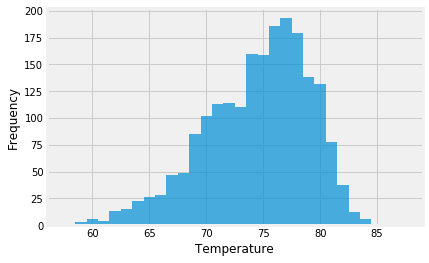

In [267]:
plt.bar(tobs_df['Temperature'], tobs_df['Frequency'], width = 1,alpha=0.7)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
